In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as cm
from pandas_profiling import ProfileReport

In [2]:
srcfile = 'D:\\FingerSpelling\\TFS_Coding\\handLms.csv'

In [3]:
df = pd.read_csv(srcfile, engine='python')

In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y12,y13,y14,y15,y16,y17,y18,y19,y20,class_name
0,364,337,294,276,286,266,185,209,238,268,...,253,295,294,291,289,338,331,325,324,like
1,365,337,294,274,283,266,185,207,237,268,...,254,293,295,292,290,336,329,325,325,like
2,368,338,292,270,276,266,184,205,234,268,...,254,290,297,294,289,334,332,326,323,like
3,369,339,294,269,276,259,184,207,236,260,...,255,294,297,294,289,336,331,327,326,like
4,368,338,292,271,275,263,184,207,236,265,...,254,288,297,296,291,333,332,328,325,like


In [5]:
df.isnull().values.any()

False

In [6]:
# # remove NaN columns
# df_drop_ax0 = df.dropna(axis=0)
# df_drop_ax0

In [7]:
# df_drop_ax0.isnull().values.any()

In [8]:
# print(df_drop_ax0.isnull().sum())

In [9]:
# feature = df_drop_ax0.iloc[:, 1:]
# label = df_drop_ax0.iloc[:, 0]
# print(f'Feature = {feature.shape}  ; Label = {label.shape}')

In [10]:
# feature

In [11]:
# label

In [12]:
check_group = df.groupby('class_name').size()
check_group

class_name
like    30
love    30
ok      30
two     30
dtype: int64

In [13]:
print(df.head(8))
print(df.class_name.unique())  # check amount of class_name

    x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  y12  y13  y14  y15  \
0  364  337  294  276  286  266  185  209  238  268  ...  253  295  294  291   
1  365  337  294  274  283  266  185  207  237  268  ...  254  293  295  292   
2  368  338  292  270  276  266  184  205  234  268  ...  254  290  297  294   
3  369  339  294  269  276  259  184  207  236  260  ...  255  294  297  294   
4  368  338  292  271  275  263  184  207  236  265  ...  254  288  297  296   
5  367  339  294  271  276  267  184  206  236  269  ...  254  289  294  294   
6  377  354  308  283  286  266  185  206  237  262  ...  257  277  293  299   
7  378  352  308  281  282  264  186  207  237  260  ...  259  279  293  298   

   y16  y17  y18  y19  y20  class_name  
0  289  338  331  325  324        like  
1  290  336  329  325  325        like  
2  289  334  332  326  323        like  
3  289  336  331  327  326        like  
4  291  333  332  328  325        like  
5  291  333  330  326  325       

In [14]:
y,class_name = pd.factorize(df.class_name,sort=True) # like = 1000, love = 0100, ok = 0010, two = 0001
print(class_name)
print(y)

Index(['like', 'love', 'ok', 'two'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3]


In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [16]:
x = df.drop('class_name',axis=1) # drop 'class_name' on axis y

x

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20
0,364,337,294,276,286,266,185,209,238,268,...,254,253,295,294,291,289,338,331,325,324
1,365,337,294,274,283,266,185,207,237,268,...,256,254,293,295,292,290,336,329,325,325
2,368,338,292,270,276,266,184,205,234,268,...,257,254,290,297,294,289,334,332,326,323
3,369,339,294,269,276,259,184,207,236,260,...,257,255,294,297,294,289,336,331,327,326
4,368,338,292,271,275,263,184,207,236,265,...,258,254,288,297,296,291,333,332,328,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,266,233,220,242,263,210,191,181,174,243,...,156,125,261,227,257,280,281,258,281,302
116,274,238,218,239,262,213,193,181,172,246,...,154,124,260,225,254,279,280,257,281,303
117,263,230,217,241,264,210,193,182,177,243,...,154,122,259,228,260,284,280,258,283,306
118,259,227,215,239,263,210,193,183,176,244,...,150,119,256,228,262,288,279,265,292,315


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split # 120 => train = 84; test = 36
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
np.array(x).shape

(120, 42)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True, random_state=42) # test 20%
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(96, 42)
(24, 42)
(96,)
(24,)


In [20]:
y_train_1h = pd.get_dummies(y_train) # 1 hot format  # like = 1000, love = 0100, ok = 0010, two = 0001
y_test_1h = pd.get_dummies(y_test)
print(y_test_1h.head(20))
print(y_train_1h.shape)
print(y_test_1h.shape)

    0  1  2  3
0   0  1  0  0
1   0  1  0  0
2   1  0  0  0
3   0  1  0  0
4   1  0  0  0
5   0  0  1  0
6   0  0  1  0
7   1  0  0  0
8   0  1  0  0
9   0  0  0  1
10  1  0  0  0
11  0  0  1  0
12  1  0  0  0
13  0  1  0  0
14  0  0  1  0
15  0  0  0  1
16  0  0  0  1
17  1  0  0  0
18  0  0  1  0
19  0  0  0  1
(96, 4)
(24, 4)


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, AveragePooling2D
from tensorflow.keras.utils import Sequence
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.metrics import f1_score, accuracy_score
import plotly.figure_factory as ff
import plotly
import plotly.graph_objs as go
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from statistics import mode, StatisticsError
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import time

In [22]:
def LSTM_model_TwoHand():
    model = Sequential()

    model.add(LSTM(units = 64, input_shape=(42, 1), activation= 'tanh', return_sequences= True))
    model.add(LSTM(units = 32, activation='tanh', return_sequences=True))
    model.add(LSTM(units= 16, activation= 'tanh'))

    # model.add(Flatten())
    model.add(Dense(units = 64, activation = 'tanh'))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 32, activation = 'tanh'))
    #model.add(Dropout(0.2))
    model.add(Dense(units= 4, activation= 'softmax'))
    model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = LSTM_model_TwoHand()
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 42, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 42, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 35,748
Trainable params: 35,748
Non-traina

In [23]:
history = model.fit(x_train,y_train_1h,epochs=25,batch_size=8,verbose=1,validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 4s 84ms/step - loss: 1.4321 - accuracy: 0.2105 - val_loss: 1.3851 - val_accuracy: 0.2500
Epoch 2/25
10/10 [==============================] - 0s 13ms/step - loss: 1.4045 - accuracy: 0.1842 - val_loss: 1.4175 - val_accuracy: 0.1000
Epoch 3/25
10/10 [==============================] - 0s 13ms/step - loss: 1.3871 - accuracy: 0.1842 - val_loss: 1.3736 - val_accuracy: 0.3500
Epoch 4/25
10/10 [==============================] - 0s 13ms/step - loss: 1.3658 - accuracy: 0.3684 - val_loss: 1.3521 - val_accuracy: 0.7000
Epoch 5/25
10/10 [==============================] - 0s 13ms/step - loss: 1.3378 - accuracy: 0.3553 - val_loss: 1.2797 - val_accuracy: 0.6500
Epoch 6/25
10/10 [==============================] - 0s 13ms/step - loss: 1.2447 - accuracy: 0.5526 - val_loss: 1.0888 - val_accuracy: 1.0000
Epoch 7/25
10/10 [==============================] - 0s 14ms/step - loss: 0.9644 - accuracy: 0.8158 - val_loss: 0.7001 - val_accuracy: 0.9500
Epoch 8/25
10

In [24]:
df_hist = pd.DataFrame.from_dict(history.history) # draw graph

Training Done


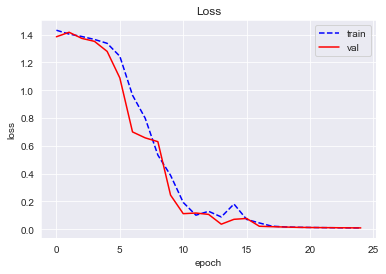

In [25]:
print("Training Done")

df_hist['loss'].plot(style='b--',label='train')
df_hist['val_loss'].plot(style='r-',label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss')
plt.show()

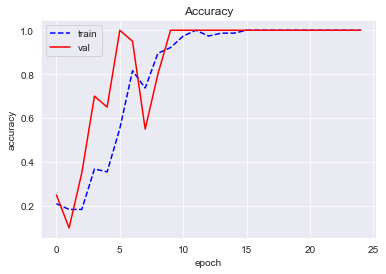

In [26]:
df_hist['accuracy'].plot(style='b--',label='train')  # 68, 16
df_hist['val_accuracy'].plot(style='r-',label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [27]:
score = model.evaluate(x_test,y_test_1h,verbose=0) # test = 36
print('test loss : ',score[0])
print('test accuracy : ',score[1])

test loss :  0.008456769399344921
test accuracy :  1.0


In [28]:
# model.save(handLms_model_filename) # handLms_model.h5

print(x_test.shape)
print(type(x_test))

(24, 42)
<class 'pandas.core.frame.DataFrame'>


In [29]:
y_pred = model.predict(x_test) # love 0100 => 0.03, 0.99, 0.02, 0.05
y_pred = np.argmax(y_pred,axis=1) # love = 0100

print(y_test) # 1
print(y_pred) # 1

[1 1 0 1 0 2 2 0 1 3 0 2 0 1 2 3 3 0 2 3 2 1 1 2]
[1 1 0 1 0 2 2 0 1 3 0 2 0 1 2 3 3 0 2 3 2 1 1 2]


In [30]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6 0 0 0]
 [0 7 0 0]
 [0 0 7 0]
 [0 0 0 4]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



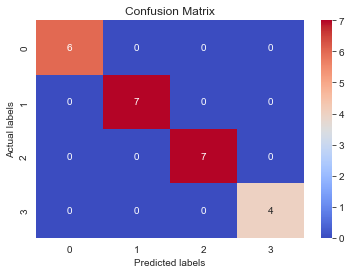

In [31]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,ax=ax,cmap='coolwarm')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
# ax.xaxis.set_ticklabels(y_targets)
# ax.yaxis.set_ticklabels(y_targets)
plt.show()